API KEY: ae89b22675ec02f644309a2de249121f

Install the "tmdbsimple" package: https://pypi.python.org/pypi/tmdbsimple

        `pip install tmdbsimple`
        
tmdbsimple is a wrapper for the TMDB API, providing python functions that perform some of the basic API requests. 

In [1]:
import tmdbsimple as tmdb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib2
import imdb
import time
%matplotlib inline

In [2]:
tmdb.API_KEY = 'ae89b22675ec02f644309a2de249121f'

# Search for a movie, get its genre and poster

In [7]:
# Search for a movie by its title
search = tmdb.Search()
response = search.movie(query='The Princess Bride')
s = search.results[0]

ia = imdb.IMDb()
s_result = ia.search_movie('The Princess Bride')
s2 = ia.get_movie(s_result[0].movieID)

In [30]:
# Grab info from the search result
print "TMDb info for " + "The Princess Bride - ID:", s['id'], ", Genre IDs:", s['genre_ids']
print "IMDb info for " + "The Princess Bride - ID:", s_result[0].movieID

 TMDb info for The Princess Bride - ID: 2493 , Genre IDs: [12, 10751, 14, 35, 10749]
IMDb info for The Princess Bride - ID: 0093779 , Genre IDs: [u'Adventure', u'Family', u'Fantasy', u'Romance']


In [52]:
# Get the genres, and the poster url
movie = tmdb.Movies(s['id']).info()
genres = movie['genres']
print [str(i["name"]) for i in genres]

poster_url = movie['poster_path']

['Adventure', 'Family', 'Fantasy', 'Comedy', 'Romance']


In [33]:
#get genres from IMDb 
[str(i) for i in s2.get('genres')]

['Adventure', 'Family', 'Fantasy', 'Romance']

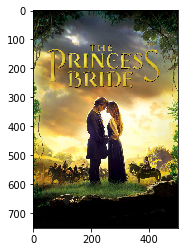

In [53]:
# Get the poster by its url and display it
img_url = 'https://image.tmdb.org/t/p/w500' + poster_url
img=plt.imread(urllib2.urlopen(img_url), format='jpeg')
plt.imshow(img)

# Get the top 10 most popular movies and their genres

In [ ]:
movies = tmdb.Movies().popular()['results']
top10 = movies[:10]

In [55]:
genres = tmdb.Genres().list()
for movie in top10:
    m = tmdb.Movies(movie['id']).info()
    genre_names = ' '.join([d['name'] for d in m['genres']])
    print movie['title'],":",genre_names

Beauty and the Beast : Fantasy Music Romance
Logan : Action Drama Science Fiction
Sing : Animation Comedy Drama Family Music
Jurassic World : Action Adventure Science Fiction Thriller
Fantastic Beasts and Where to Find Them : Adventure Action Fantasy
Finding Dory : Adventure Animation Comedy Family
Interstellar : Adventure Drama Science Fiction
Mad Max: Fury Road : Action Adventure Science Fiction Thriller
Rogue One: A Star Wars Story : Action Drama Science Fiction War
Split : Horror Thriller


# Exploratory Data Analysis

## Explore genres in pairs

In [3]:
import multiprocessing 
import random 

In [ ]:
# get movie, genre pairs from TMDb
latest_id = tmdb.Movies().latest()['id']
global movie_dictionary 
movie_dictionary = {}
    
def worker(i):
    try:
        movie = tmdb.Movies(i).info()
    except:
        movie = ""
    return [i, movie]

ids = list(range(1,latest_id))[1:10000]
random.shuffle(ids)

p = multiprocessing.Pool()
ans = p.map(worker,ids)
for i in ans:
    if i[1]:
        movie_dictionary[i[0]] = i[1] 


In [10]:
for i in movie_dictionary:
    print movie_dictionary[i]

{u'poster_path': u'/gZCJZOn4l0Zj5hAxsMbxoS6CL0u.jpg', u'production_countries': [{u'iso_3166_1': u'FI', u'name': u'Finland'}], u'revenue': 0, u'overview': u"Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned...", u'video': False, u'id': 2, u'genres': [{u'id': 18, u'name': u'Drama'}, {u'id': 80, u'name': u'Crime'}], u'title': u'Ariel', u'tagline': u'', u'vote_count': 33, u'homepage': u'', u'belongs_to_collection': {u'poster_path': None, u'backdrop_path': u'/ibLeWo3X3dVo4rxvn4m3y90ms1I.jpg', u'name': u'Proletariat Collection', u'id': 8384}, u'original_language': u'fi', u'status': u'Released', u'spoken_languages': [{u'iso_639_1': u'fi', u'name': u'suomi'}, {u'iso_639_1': u'de', u'name': u'Deutsch'}], u'imdb_id': u'tt0094675', u'adult': False, u'backdrop_path': u'/z2QUexmccqrvw1kDMw